In [4]:
## Data size
print('Data size:\n')
print(f'{data.shape[0]} rows')
print(f'{data.shape[1]} columns')

Data size:

7001 rows
7 columns


In [5]:
# Data set information
print("**"*20)
print(" "*10 + str('Data set Information'))
print("**"*20)
data.info()

****************************************
          Data set Information
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Index              7001 non-null   int64  
 1   Name               7001 non-null   object 
 2   Area               7001 non-null   object 
 3   Review_Date        7001 non-null   object 
 4   Rating_attribute   7001 non-null   object 
 5   Rating(Out of 10)  7001 non-null   float64
 6   Review_Text        6996 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 383.0+ KB


In [6]:
## Checking duplicate rows
print('Duplicate rows:')
print(data.duplicated().sum())

Duplicate rows:
0


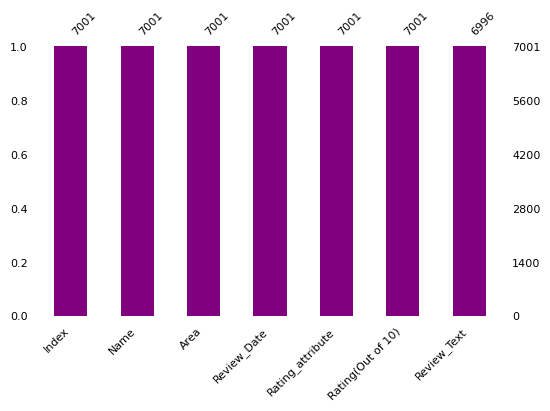

In [7]:
## Checking missing values
fig,ax = plt.subplots(figsize = (6,3.5))
ms.bar(data, color = 'purple', ax = ax, fontsize = 8)
plt.show()

In [8]:
## We remove missing values
data.dropna(inplace = True)

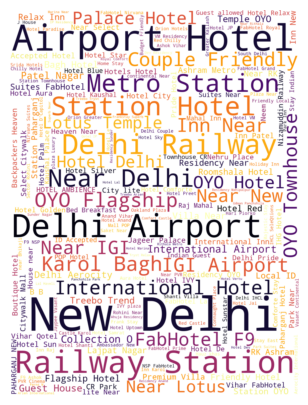

In [9]:
# Word Cloud: Name
all_text_name = ' '.join(data['Name'])

wc_name = WordCloud(width = 1500,
               height = 2000,
               stopwords = STOPWORDS,
               background_color = 'white',
               colormap = 'inferno',
               random_state = 42).generate(all_text_name)

plt.figure(figsize = (9,5))
plt.imshow(wc_name, interpolation = 'bilinear')
plt.axis('off')
plt.show()

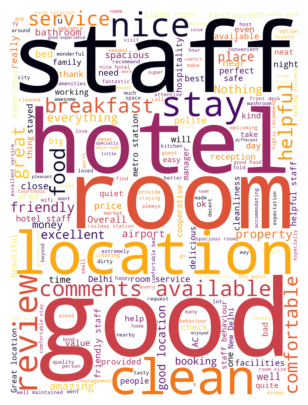

In [10]:
# Word Cloud: Review Text

all_text_review = ' '.join(data['Review_Text'])

wc_review = WordCloud(width = 1500,
                      height = 2000,
                      stopwords = STOPWORDS,
                      background_color = 'white',
                      colormap = 'inferno',
                      random_state = 42).generate(all_text_review)

plt.figure(figsize = (9,5))
plt.imshow(wc_review, interpolation = 'bilinear')
plt.axis('off')
plt.show()

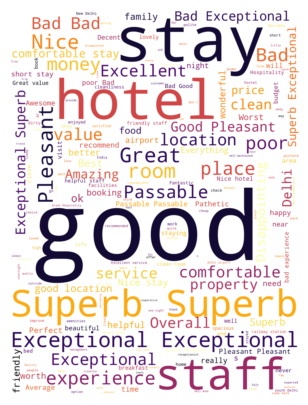

In [11]:
# Word Cloud: Rating attribute

all_text_attribute = ' '.join(data['Rating_attribute'])

wc_attribute = WordCloud(width = 1500,
                        height = 2000,
                        stopwords = STOPWORDS,
                        background_color = 'white',
                        colormap = 'inferno',
                        random_state = 42).generate(all_text_attribute)

plt.figure(figsize = (9,5))
plt.imshow(wc_attribute, interpolation = 'bilinear')
plt.axis('off')
plt.show()

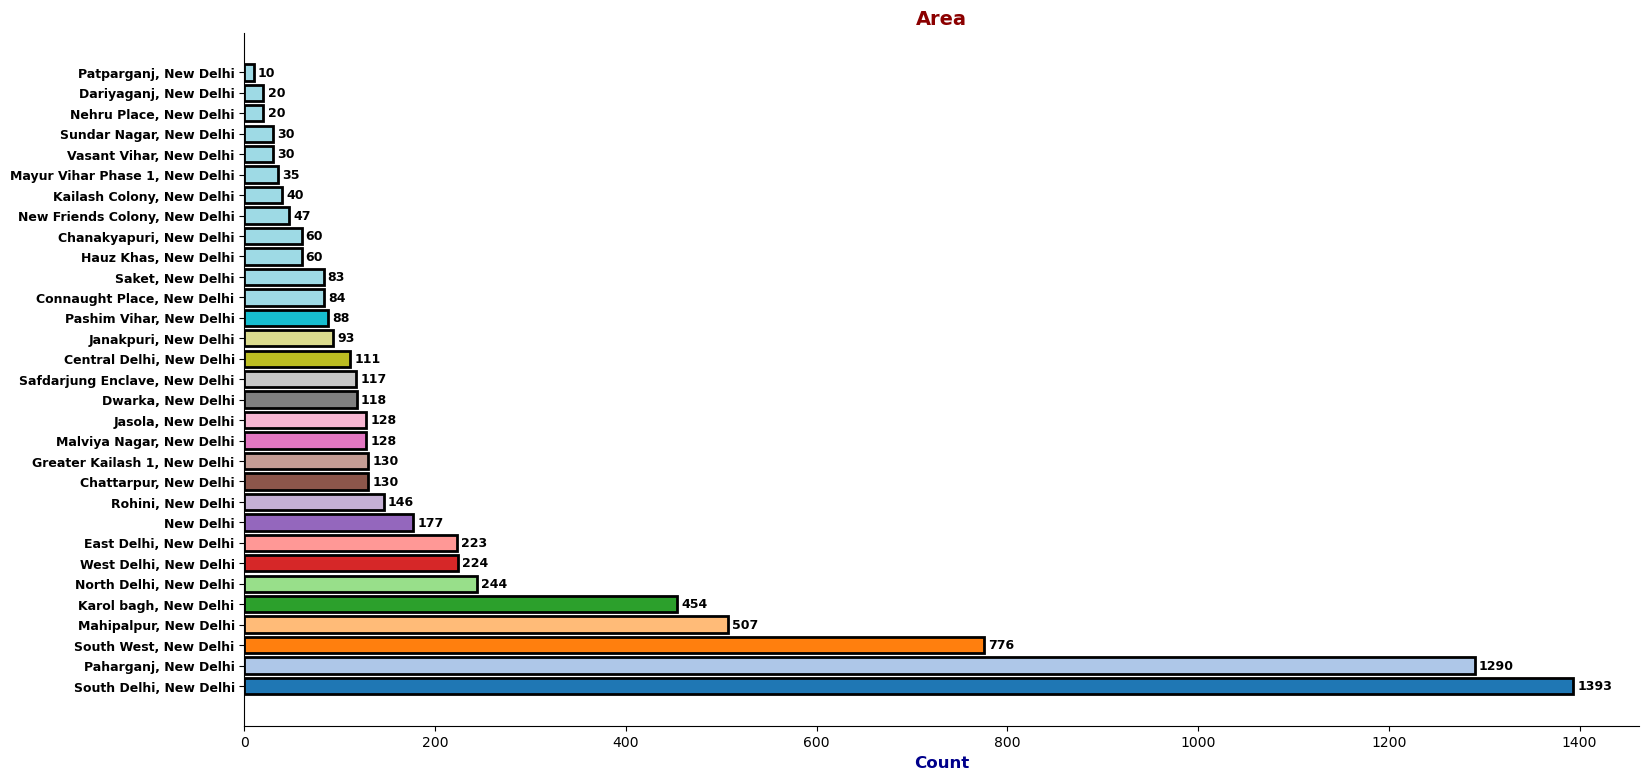

In [12]:
# We define the size of our figure.
fig,ax = plt.subplots(figsize=(18,9))

# 1. We create our dataframe that contains our data to be displayed.
df_plot_area = data['Area'].value_counts().to_frame()

# 2. We generate the values of our graphs.
values = df_plot_area.iloc[:,0]
# 3. We generate the labels for our charts.
labels = df_plot_area.index.to_list()
# 4. We generate the color map.
cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))


# 2. Bar chart.
rects = ax.barh(labels, values, color = colors,
                  edgecolor = 'black', linewidth = 2.0)

ax.set_title("Area", fontsize = 14, fontweight = 'bold', color = 'darkred')
ax.set_xlabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_yticklabels(labels, fontsize = 9, fontweight = 'bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# function to label our bars.
def autolabel(rects):
  for rect in rects:
    width = rect.get_width()
    ax.annotate(text = '{}'.format(width),
                xy = (width, rect.get_y() + rect.get_height()/2.),
                xytext = (3,0),
                textcoords = 'offset points',
                va = 'center',
                ha = 'left',
                weight = 'bold',
                size = 9,
                color = 'black')

autolabel(rects) # we label our bars.

fig.show()

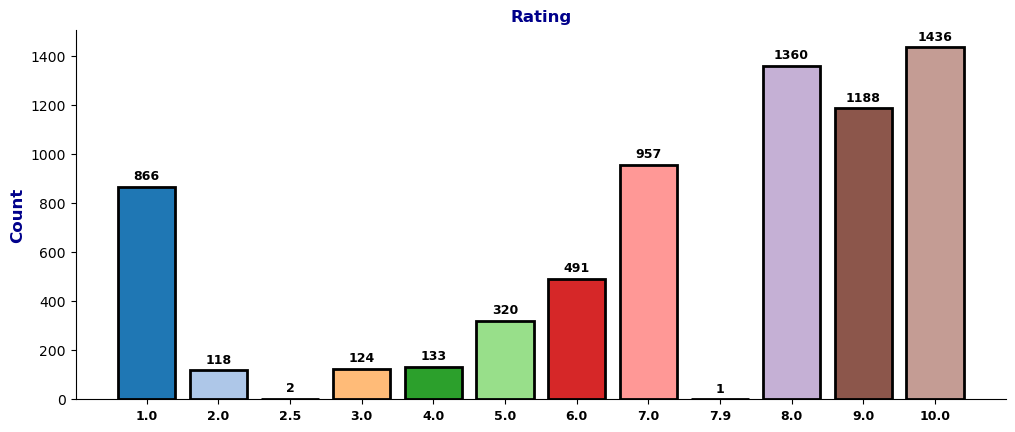

In [13]:
# We define the size of our figure.
fig,ax = plt.subplots(figsize=(12,4.8))

# 1. We create our dataframe that contains our data to be displayed.
df_plot_rating = data['Rating(Out of 10)'].value_counts().to_frame()
df_plot_rating = df_plot_rating.sort_index()
df_plot_rating.index = df_plot_rating.index.astype('str')

# 2. We generate the values of our graphs.
values = df_plot_rating.iloc[:,0]
# 3. We generate the labels for our charts.
labels = df_plot_rating.index.to_list()
# 4. We generate the color map.
cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))


# 2. Bar chart.
rects = ax.bar(labels, values, color = colors,
                  edgecolor = 'black', linewidth = 2.0)

ax.set_title("Name", fontsize = 10, fontweight = 'bold', color = 'darkred')
ax.set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_title('Rating', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax.set_xticklabels(labels, fontsize = 9, fontweight = 'bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# function to label our bars.
def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(text = '{}'.format(height),
                xy = (rect.get_x() + rect.get_width()/2, height),
                xytext = (0,3),
                textcoords = 'offset points',
                va = 'bottom',
                ha = 'center',
                weight = 'bold',
                size = 9,
                color = 'black')

autolabel(rects) # we label our bars.

fig.show()

In [14]:
# Now we are going to binarize our variable Rating(Out of 10) which is our target variable:
# values that are greater than zero up to six will be assigned as zero.
# values greater than six will be assigned as one.
# finally we convert our data to float type.
data['Rating_binary'] = pd.cut(data['Rating(Out of 10)'],
                               bins = [0, 6.0, 10.0],
                               labels = [0,1]).astype(float)

# We visualize the new variable that has been created called 'Rating Binary'.
data['Rating_binary']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
6996    1.0
6997    1.0
6998    1.0
6999    1.0
7000    0.0
Name: Rating_binary, Length: 6996, dtype: float64

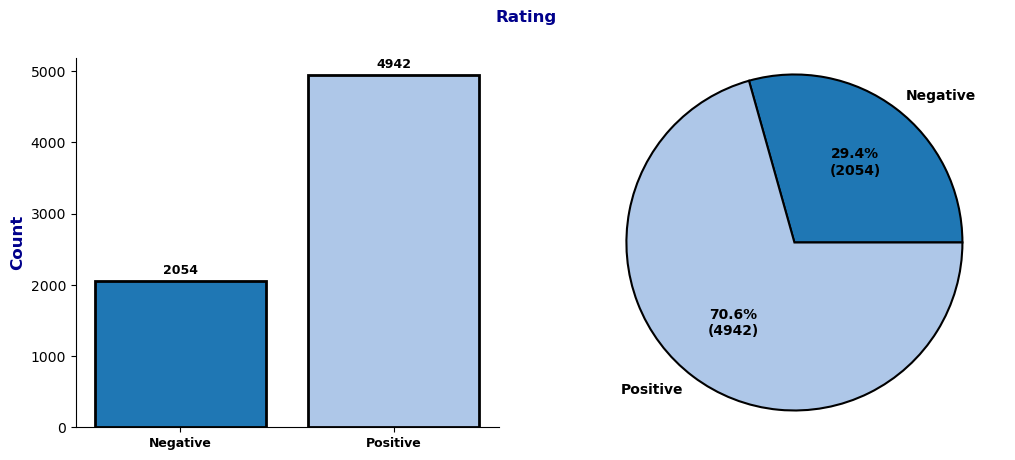

In [15]:
# We define the size of our figure.
fig,ax = plt.subplots(1,2,figsize=(12,4.8))

# 1. We create our dataframe that contains our data to be displayed.
df_plot_rating_binary = data['Rating_binary'].value_counts().to_frame()
df_plot_rating_binary = df_plot_rating_binary.sort_index()
df_plot_rating_binary.index = df_plot_rating_binary.index.astype('str')

# 2. We generate the values of our graphs.
values = df_plot_rating_binary.iloc[:,0]
# 3. We generate the labels for our charts.
labels = df_plot_rating_binary.index.to_list()
# 4. We generate the color map.
cmap = plt.get_cmap('tab20')
colors = cmap(np.arange(len(labels)))


# 5. Bar chart.
rects = ax[0].bar(labels, values, color = colors,
                  edgecolor = 'black', linewidth = 2.0)

ax[0].set_ylabel('Count', fontsize = 12, fontweight = 'bold', color = 'darkblue')
ax[0].set_xticklabels(['Negative', 'Positive'], fontsize = 9, fontweight = 'bold')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

# function to label our bars.
def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax[0].annotate(text = '{}'.format(height),
                xy = (rect.get_x() + rect.get_width()/2, height),
                xytext = (0,3),
                textcoords = 'offset points',
                va = 'bottom',
                ha = 'center',
                weight = 'bold',
                size = 9,
                color = 'black')
autolabel(rects) # we label our bars.

# 6. Pie chart
def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

ax[1].pie(x = values, labels = ['Negative', 'Positive'], autopct = autopct_fun(values),
          colors = colors,
          wedgeprops = {'linewidth':1.5, 'edgecolor':'black'},
          textprops = {'fontsize':10, 'fontweight':'bold'})

ax[1].axis('equal')


fig.suptitle('Rating', fontsize = 12, fontweight = 'bold', color = 'darkblue')
fig.show()

Max seq = 294


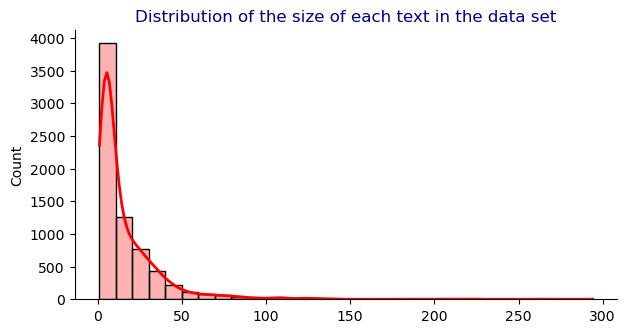

In [16]:
# We visualize how the lengths of each of our values (text) are distributed.
seq_len = []
for i in data['Review_Text'].str.split():
  seq_len.append(len(i))

fig,ax = plt.subplots(figsize = (7,3.5))
sns.histplot(seq_len, bins = 30, kde = True, color = 'red',line_kws = {'linewidth':2.0}, alpha = 0.3, ax = ax)
ax.set_title('Distribution of the size of each text in the data set', color = 'darkblue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
max_seq = max(seq_len) # we get the maximum value of all sequence lengths.
print("======================")
print(f'Max seq = {max_seq}')
print("======================")
plt.show()

In [17]:
# We define the stopwords in the English language.
stop_words = set(stopwords.words('english'))

In [18]:
# We create a function to preprocess our data, in this case the function will do the following:
# - A split is generated for each text and then each of the words contained in said text will be converted to lower case.
# - We will only keep the words that are not considered as stopwords.
def preprocess_text(text):
  text = [word.lower() for word in text.split()]
  text = [word for word in text if word not in stop_words]
  return ' '.join(text)

In [19]:
# We create a new column called 'Review_Text_2' which is the result of applying the function we have created and 
# applied to the 'Review_Text' column.
data['Review_Text_2'] = data['Review_Text'].apply(lambda x: preprocess_text(x))
data['Review_Text_2']

0       hotel pearl perfect place stay delhi paharganj...
1       location hotel perfect. hotel peaceful nice. s...
2                                  location, indian food.
3       location hotel great. next time stay here. nic...
4       friendly smiling staffs.. reception staff exce...
                              ...                        
6996    room good, comfortable aesthetic hotel good lo...
6997                                           good hotel
6998    good experience hotel good staff well done foo...
6999                                            well done
7000                                              nothing
Name: Review_Text_2, Length: 6996, dtype: object

Max seq = 167


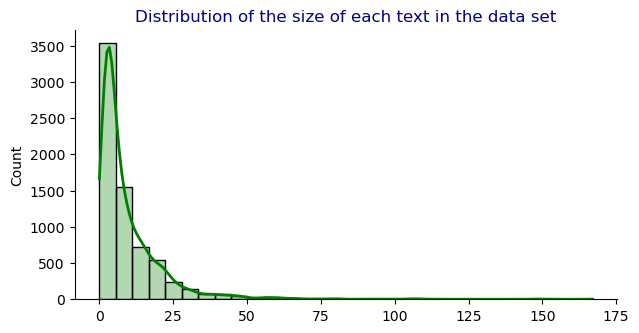

In [20]:
# We visualize how the lengths of each of our values (text) of the new feature (Review_Text_2) are distributed.
seq_len = []
for i in data['Review_Text_2'].str.split():
  seq_len.append(len(i))

fig,ax = plt.subplots(figsize = (7,3.5))
sns.histplot(seq_len, bins = 30, kde = True, color = 'green', line_kws = {'linewidth':2.0}, alpha = 0.3, ax = ax)
ax.set_title('Distribution of the size of each text in the data set', color = 'darkblue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
max_seq = max(seq_len) # we get the maximum length of all sequences.
print("=======================")
print(f'Max seq = {max_seq}')
print("=======================")
fig.show()

In [21]:
# We select the features that interest us for the reviews classification:
X = data['Review_Text_2'] # it has to be in pd.Series format
y = data['Rating_binary'] # it has to be in pd.Series format

In [22]:
## We split our dataset into training and testing:
# First we define our random seed for reproducibility.
SEED = 42

X_train, X_test, y_train, y_test = tts(X,
                                       y,
                                       test_size = 0.3,
                                       stratify = y,
                                       shuffle = True,
                                       random_state = SEED)

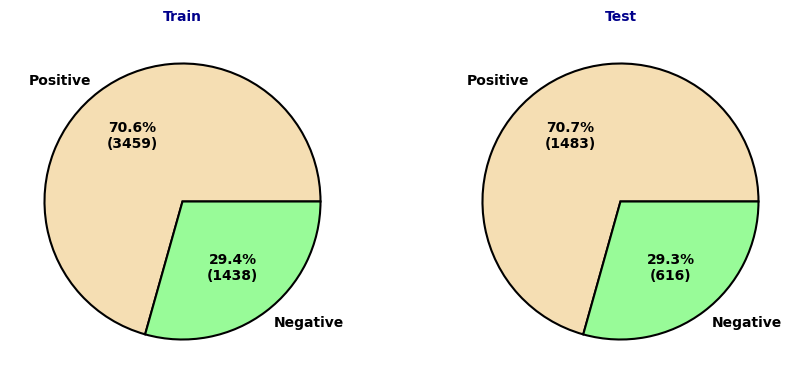

In [23]:
# Visualization of the objective variable in the training and test set.
df_pct_train = y_train.value_counts().to_frame().rename(index = {0:'Negative', 
                                                                 1:'Positive'})
df_pct_train = df_pct_train.rename(columns = {'y':'count'})

labels_train = df_pct_train.index.to_list()
values_train = df_pct_train.iloc[:,0]

df_pct_test = y_test.value_counts().to_frame().rename(index = {0:'Negative', 
                                                               1:'Positive'})
df_pct_test = df_pct_test.rename(columns = {'y':'count'})

labels_test = df_pct_test.index.to_list()
values_test = df_pct_test.iloc[:,0]


fig,axes = plt.subplots(1,2,figsize = (9,4))

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"


axes[0].pie(x = values_train, labels = labels_train, autopct = autopct_fun(values_train),
            colors = ['#F5DEB3','#98FB98'],
            wedgeprops = {'linewidth':1.5, 'edgecolor':'black'},
            textprops = {'fontsize':10, 'fontweight':'bold'})
axes[0].set_title('Train', fontsize = 10, fontweight = 'bold', color = 'darkblue')

axes[1].pie(x = values_test, labels = labels_test, autopct = autopct_fun(values_test),
            colors = ['#F5DEB3','#98FB98'],
            wedgeprops = {'linewidth':1.5, 'edgecolor':'black'},
            textprops = {'fontsize':10, 'fontweight':'bold'})
axes[1].set_title('Test', fontsize = 10, fontweight = 'bold', color = 'darkblue')


fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.show()

# **6. Model: DestilBERT**

In [24]:
## progress bar
from tqdm.auto import tqdm

## Typing
from typing import Dict,List,Tuple

## Torch
import torch
from torch import nn,optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

## Transformers
from transformers import DistilBertTokenizer, DistilBertModel

In [25]:
## We load everything related to the DestilBERT model.

# Model name.
name_model = 'distilbert-base-cased'

# Pretrained model.
destilbert = DistilBertModel.from_pretrained(name_model)

# Tokenizer.
tokenizer = DistilBertTokenizer.from_pretrained(name_model)

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertModel: ['vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [26]:
## Define device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [27]:
## Tokenizer

# We define the maximum sequence.
MAX_SEQ = 200

# Tokenize the train set.
train_text = tokenizer.batch_encode_plus(X_train.tolist(), # We convert our pd.Series to list format.
                                         max_length = MAX_SEQ,
                                         truncation = True,
                                         add_special_tokens = True,
                                         return_attention_mask = True,
                                         padding = 'max_length',
                                         return_token_type_ids = False)

# Tokenize the test set.
test_text = tokenizer.batch_encode_plus(X_test.tolist(), # We convert our pd.Series to list format.
                                        max_length = MAX_SEQ,
                                        truncation = True,
                                        add_special_tokens = True,
                                        return_attention_mask = True,
                                        padding = 'max_length',
                                        return_token_type_ids = False)

In [28]:
## We transform our sequences (data) to tensor type: torch.long
train_seq = torch.tensor(train_text['input_ids'], dtype = torch.long)
test_seq = torch.tensor(test_text['input_ids'], dtype = torch.long)

In [29]:
## We transform our attention masks to tensor type:torch.long
train_mask = torch.tensor(train_text['attention_mask'], dtype = torch.long)
test_mask = torch.tensor(test_text['attention_mask'], dtype = torch.long)

In [30]:
## We transform our labels to type torch:torch.long
train_label = torch.tensor(y_train.tolist(), dtype = torch.float)
test_label = torch.tensor(y_test.tolist(), dtype = torch.float)

In [31]:
## Then we transform all our data to TensorDataset data type
train_data = TensorDataset(train_seq, train_mask, train_label)
test_data = TensorDataset(test_seq, test_mask, test_label)

In [32]:
## Finally we transform all our datasets to DataLoader.
train_dataloader = DataLoader(train_data, batch_size = 16, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 16, shuffle = False)

In [33]:
# We create the DistilBERT model
class DestilBERT(nn.Module):
  def __init__(self, bert):
    super(DestilBERT, self).__init__()
    self.destilbert = destilbert

    self.hidden1 = nn.Linear(self.destilbert.config.hidden_size, 128)
    self.act1 = nn.ReLU()
    self.dropout1 = nn.Dropout(p=0.3)

    self.hidden2 = nn.Linear(128, 64)
    self.act2 = nn.ReLU()
    self.dropout2 = nn.Dropout(p=0.3)

    self.hidden3 = nn.Linear(64, 1)

  def forward(self, sent_id, mask):

    output = self.destilbert(input_ids = sent_id, attention_mask = mask,
                             return_dict = False)
    cls_hs = output[0][:, 0, :]

    x = self.hidden1(cls_hs)
    x = self.act1(x)
    x = self.dropout1(x)

    x = self.hidden2(x)
    x = self.act2(x)
    x = self.dropout2(x)

    x = self.hidden3(x)

    x = F.sigmoid(x)

    return x

In [34]:
# We instantiate the model
model = DestilBERT(destilbert)
model = model.to(device)

In [35]:
## Checking this part of the code helps us a lot.
t_seq, t_mask, t_label = next(iter(train_dataloader))
print(t_seq.shape , t_mask.shape, t_label.shape)

## This part is very important.
model(t_seq.to(device), t_mask.to(device))

torch.Size([16, 200]) torch.Size([16, 200]) torch.Size([16])


tensor([[0.4561],
        [0.4560],
        [0.4923],
        [0.4742],
        [0.4604],
        [0.4708],
        [0.4806],
        [0.4681],
        [0.4678],
        [0.4809],
        [0.4789],
        [0.4768],
        [0.4442],
        [0.4794],
        [0.4847],
        [0.4840]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [36]:
# 1. Get a batch and labels(labels) from the DataLoader.
t_seq, t_mask, t_label = next(iter(train_dataloader))

# 2. Get a single batch review and unsqueeze(unsqueeze()) it so its shape fits the model
t_seq_single, t_mask_single, t_label_single = t_seq[0].unsqueeze(dim=0), t_mask[0].unsqueeze(dim=0), t_label[0].unsqueeze(dim=0)
print(f"t_seq_single shape: {t_seq_single.shape}\n")

# 3. Perform a forward pass on a single review
model.eval()
with torch.inference_mode():
    pred = model(t_seq_single.to(device), t_mask_single.to(device))

# 4. Print out what is happening and convert model logits -> pred probs -> pred label
print(f"Output prediction probabilities:\n{pred}\n")
print(f"Output prediction label:\n{torch.round(pred)}\n")
print(f"Actual label:\n{t_label_single}")

t_seq_single shape: torch.Size([1, 200])

Output prediction probabilities:
tensor([[0.4688]], device='cuda:0')

Output prediction label:
tensor([[0.]], device='cuda:0')

Actual label:
tensor([1.])


In [37]:
# loss function
loss_fn = nn.BCELoss().to(device)
# Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [38]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer):

  model.train()

  train_loss, train_acc = 0. , 0.

  for batch ,(t_seq, t_mask, t_label) in enumerate(dataloader):

    t_seq, t_mask, t_label = t_seq.to(device), t_mask.to(device), t_label.unsqueeze(dim=1).to(device)

    y_pred = model(t_seq, t_mask)

    loss = loss_fn(y_pred, t_label)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    # clip the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(),1.0)

    optimizer.step()


    y_pred_class = torch.round(y_pred)
    train_acc += (y_pred_class == t_label).sum().item()/len(y_pred)

  # Tune metrics to get average loss and accuracy per batch
  train_loss = train_loss/len(dataloader)
  train_acc = train_acc/len(dataloader)

  return train_loss, train_acc

In [39]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module):

  model.eval()

  test_loss, test_acc = 0. , 0.

  with torch.inference_mode():
    for batch, (t_seq, t_mask, t_label) in enumerate(dataloader):

      t_seq,t_mask,t_label = t_seq.to(device), t_mask.to(device), t_label.unsqueeze(dim=1).to(device)

      y_pred = model(t_seq, t_mask)

      loss = loss_fn(y_pred, t_label)
      test_loss += loss.item()

      # Metrics compute
      y_pred_class = torch.round(y_pred)
      test_acc += (y_pred_class == t_label).sum().item()/len(y_pred)

    # Tune metrics to get average loss and accuracy per batch
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc/len(dataloader)

    return test_loss, test_acc

In [40]:
# Save the best model
def save_checkpoint(filename, epoch, model, optimizer):
  state = {'epoch':epoch,
           'model':model,
           'optimizer':optimizer}
  torch.save(state, filename)

In [41]:
## Function executed by the neural network.

def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module = nn.BCELoss(),
          epochs:int=10):

  best_test_loss = float('inf')


  results = {'train_loss':[],
             'train_acc':[],
             'test_loss':[],
             'test_acc':[]}


  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model = model,
                                       dataloader = train_dataloader,
                                       loss_fn = loss_fn,
                                       optimizer = optimizer)

    test_loss, test_acc = test_step(model = model,
                                    dataloader = test_dataloader,
                                    loss_fn = loss_fn)

    if test_loss < best_test_loss:
       best_test_loss = test_loss
       file_name = 'topic_saved_weights.pt'
       save_checkpoint(file_name, epoch, model, optimizer)


    print(
      f"Epoch: {epoch+1} | "
      f"train_loss: {train_loss:.4f} | "
      f"train_accuracy: {train_acc:.4f} | "
      f"test_loss: {test_loss:.4f} | "
      f"test_accuracy: {test_acc:.4f} |")


    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)


  return results

In [42]:
## We run the training

# We define the random seed
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# We define the number of epochs
EPOCHS = 50

# start timer
from timeit import default_timer as timer
start_time = timer()

# Training model
model_results = train(model = model,
                      train_dataloader = train_dataloader,
                      test_dataloader = test_dataloader,
                      optimizer = optimizer,
                      loss_fn = loss_fn,
                      epochs = EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6806 | train_accuracy: 0.5833 | test_loss: 0.6471 | test_accuracy: 0.7083 |
Epoch: 2 | train_loss: 0.6331 | train_accuracy: 0.7042 | test_loss: 0.6126 | test_accuracy: 0.7083 |
Epoch: 3 | train_loss: 0.6120 | train_accuracy: 0.7072 | test_loss: 0.6017 | test_accuracy: 0.7083 |
Epoch: 4 | train_loss: 0.6060 | train_accuracy: 0.7072 | test_loss: 0.5975 | test_accuracy: 0.7083 |
Epoch: 5 | train_loss: 0.6046 | train_accuracy: 0.7042 | test_loss: 0.5913 | test_accuracy: 0.7083 |
Epoch: 6 | train_loss: 0.5879 | train_accuracy: 0.7072 | test_loss: 0.5666 | test_accuracy: 0.7083 |
Epoch: 7 | train_loss: 0.5681 | train_accuracy: 0.7042 | test_loss: 0.5427 | test_accuracy: 0.7083 |
Epoch: 8 | train_loss: 0.5452 | train_accuracy: 0.7072 | test_loss: 0.5187 | test_accuracy: 0.7083 |
Epoch: 9 | train_loss: 0.5226 | train_accuracy: 0.7068 | test_loss: 0.4961 | test_accuracy: 0.7083 |
Epoch: 10 | train_loss: 0.5036 | train_accuracy: 0.7081 | test_loss: 0.4769 | test_accuracy

In [43]:
## Function to plot loss and metric
def plot_loss_curves(results: Dict[str, List[float]]):
    """
    Args:
        results (dict): dictionary containing a list of values, for example:
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    loss = results['train_loss']
    test_loss = results['test_loss']

    acc = results['train_acc']
    test_acc = results['test_acc']

    # Total epochs
    epochs = range(len(results['train_loss']))

    # Define figure
    fig,axes = plt.subplots(1,2,figsize=(9, 3.5))

    # Loss plot
    axes[0].plot(epochs, loss, label='train_loss', color = 'red')
    axes[0].plot(epochs, test_loss, label='test_loss', color = 'blue')
    axes[0].set_title('Loss', fontsize = 12, fontweight = 'bold', color = 'darkred')
    axes[0].set_xlabel('Epochs', fontsize = 10, fontweight = 'bold', color = 'black')
    axes[0].legend()

    # Accuracy plot
    axes[1].plot(epochs, acc, label='train_accuracy', color = 'red')
    axes[1].plot(epochs, test_acc, label='test_accuracy', color = 'blue')
    axes[1].set_title('Accuracy', fontsize = 12, fontweight = 'bold', color = 'darkred')
    axes[1].set_xlabel('Epochs', fontsize = 10, fontweight = 'bold', color = 'black')
    axes[1].legend()

    fig.show()

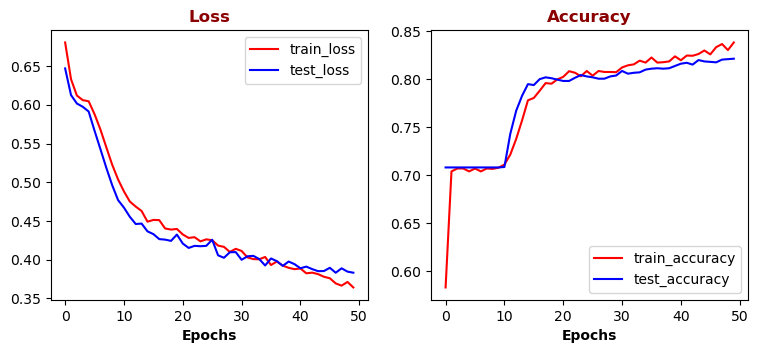

In [44]:
## Results plot
plot_loss_curves(model_results)

In [46]:
# Prediction
class Prediction:
  def __init__(self, review_text):

    path = 'topic_saved_weights.pt'
    checkpoint = torch.load(path,map_location=device)

    self.predictor = checkpoint.get('model')
    self.review_text = review_text.tolist()

  def prediction(self):
    encoding_review = tokenizer.batch_encode_plus(self.review_text,
                                            max_length = 200,
                                            truncation = True,
                                            add_special_tokens = True,
                                            return_token_type_ids = False,
                                            padding = 'max_length',
                                            return_attention_mask = True)

    input_ids = torch.tensor(encoding_review['input_ids'], dtype = torch.long).to(device)
    attention_mask = torch.tensor(encoding_review['attention_mask'], dtype = torch.long).to(device)

    with torch.no_grad():
        preds = model(input_ids, attention_mask)
        preds = preds.detach().cpu().numpy()

    preds_class = np.round(preds)

    return preds_class

In [47]:
## We make the predictions of the training set:

# We create a list to store the predicted classes.
class_pred_train = []
# We iterate in batches where each contains 100 samples.
for i in range(0, X_train.shape[0], 100):
  pred_data_train = Prediction(X_train[i:i+100])
  class_pred_data_train = pred_data_train.prediction()
  class_pred_data_train = class_pred_data_train.squeeze()
  class_pred_train.append(class_pred_data_train)

# Finally, we concatenate the predicted classes into an array.
y_pred_train = np.concatenate((class_pred_train))

In [48]:
## We make the predictions of the test set:

# We create a list to store the predicted classes.
class_pred_test = []
# We iterate in batches where each contains 100 samples.
for i in range(0, X_test.shape[0], 100):
  pred_data_test = Prediction(X_test[i:i+100])
  class_pred_data_test = pred_data_test.prediction()
  class_pred_data_test = class_pred_data_test.squeeze()
  class_pred_test.append(class_pred_data_test)

# Finally, we concatenate the predicted classes into an array.
y_pred_test = np.concatenate((class_pred_test))

In [49]:
##********************************************************* Metrics ****************************************
def classification_metrics(y_true:pd.Series,
                           y_pred:np.ndarray):
  """
  Function to calculate the following Classification Metrics.

  - accuracy
  - f1_score
  - precision
  - recall
  - specificity

  Args:
  - y_true(array): true value.
  - y_pred(array): predicted value.
  """

  # accuracy score
  accuracy = round(accuracy_score(y_true, y_pred),3)
  # f1 score
  f1 = round(f1_score(y_true, y_pred),3)
  # preicision score
  precision = round(precision_score(y_true, y_pred),3)
  # recall score
  recall = round(recall_score(y_true, y_pred),3)
  # specificity score
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  specificity = round(tn/(tn+fp),3)


  my_metrics = {'accuracy':accuracy,
                'f1_score':f1,
                'precision':precision,
                'recall':recall,
                'specificity':specificity}

  return my_metrics

In [50]:
##***************************************** Plot Metrics *****************************************
def plot_metrics(metrics_train:dict, metrics_test:dict, metrics:list)->None:
    """
    Function to plot the selected metrics.
    Note: Choose 4 metrics.

    Args:

      - metrics_train(dict): metrics of the training set.
      - metrics_test(dict): metrics of the testing set.
      - metrics(list): metrics list.
    """

    df_metrics = pd.DataFrame(index = metrics,
                              data = {'Train':[metrics_train[metric] for metric in metrics],
                                      'Test':[metrics_test[metric] for metric in metrics]})


    n = len(df_metrics.index)
    x = np.arange(n)


    width = 0.25

    fig,ax = plt.subplots(figsize=(6,4))

    rects1 = ax.bar(x-width, df_metrics.Train, width=width, label='Train',linewidth=1.6,edgecolor='black',color='blue')

    rects2 = ax.bar(x, df_metrics.Test, width=width, label='Test',linewidth=1.6, edgecolor='black', color = 'red')

    ax.set_title('Metrics',fontsize=12, fontweight='bold')
    ax.set_ylabel('Score',fontsize=10, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xticks(x-0.13)
    ax.set_xticklabels(df_metrics.index, fontsize=10, fontweight='bold')
    ax.legend()

    def autolabel(rects):

      for rect in rects:
          height = rect.get_height()
          ax.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height-0.005),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom', size = 7, weight = 'bold')

    autolabel(rects1)
    autolabel(rects2)
    fig.tight_layout()
    fig.show()

In [51]:
##********************************** Confusion Matrix Plot *****************************************
def confusion_matrix_plot(y_train:pd.Series,
                           y_pred_train:np.ndarray,
                           y_test:pd.Series,
                           y_pred_test:np.ndarray,
                           classes:list)->None:

    """
    Function to plot the confusion matrices for the training and test set.

    Args:

      - y_train(Series): true value of the target variable of the training set.
      - y_pred_train(array): predicted value of the target variable of the training set.
      - y_test(Series): true value of the target variable of the test set.
      - y_pred_test(array): predicted value of the target variable of the test set.
      - classes(list): list of containing the classes of the target variable.
    """

    # We calculate the confusion matrices for training and testing.
    confusion_train = confusion_matrix(y_train, y_pred_train)

    confusion_test = confusion_matrix(y_test, y_pred_test)

    # Calculate the percentages
    sumatoria_train = np.sum(confusion_train, axis = 1)
    porcentajes_train = confusion_train / sumatoria_train[:,np.newaxis]*100

    sumatoria_test = np.sum(confusion_test, axis = 1)
    porcentajes_test = confusion_test / sumatoria_test[:,np.newaxis]*100


    etiquetas_train = [['{} \n({:.1f}%)'.format(val, porc) for val,porc in zip(row,porc_row)] for row, porc_row in zip(confusion_train, porcentajes_train)]

    etiquetas_test = [['{} \n({:.1f}%)'.format(val, porc) for val,porc in zip(row,porc_row)] for row, porc_row in zip(confusion_test, porcentajes_test)]


    fig,axes = plt.subplots(1,2,figsize=(9,4))
    sns.heatmap(confusion_train,
                annot = np.array(etiquetas_train),
                fmt = '',
                cmap = 'Blues',
                cbar = False,
                square = True,
                linewidths = 0.7,
                linecolor = 'white',
                ax = axes[0])
    sns.heatmap(confusion_test,
                annot = np.array(etiquetas_test),
                fmt = '',
                cmap = 'Oranges',
                cbar = False,
                square = True,
                linewidths = 0.7,
                linecolor = 'white',
                ax = axes[1])
    # Add the texts TP, FN, FP, TN to the train matrix
    axes[0].text(0.5, 0.65, 'TN', ha='center', va='center', fontsize=9, fontweight='bold')
    axes[0].text(1.5, 0.65, 'FP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[0].text(0.5, 1.65, 'FN', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[0].text(1.5, 1.65, 'TP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[0].set_title('Confusion Matrix Train',fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Predicted', fontsize=10, fontweight='bold')
    axes[0].set_ylabel('Real', fontsize=10, fontweight='bold')
    axes[0].set_xticklabels(classes)
    axes[0].set_yticklabels(classes)
    axes[0].tick_params(rotation=0, size = 8)

    # Add the texts TP, FN, FP, TN to the test matrix
    axes[1].text(0.5, 0.65, 'TN', ha='center', va='center', fontsize=9, fontweight='bold')
    axes[1].text(1.5, 0.65, 'FP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[1].text(0.5, 1.65, 'FN', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[1].text(1.5, 1.65, 'TP', ha='center', va='center', fontsize=8, fontweight='bold')
    axes[1].set_title('Confusion Matrix Test',fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Predicted', fontsize=10, fontweight='bold')
    axes[1].set_ylabel('Real', fontsize=10, fontweight='bold')
    axes[1].set_xticklabels(classes)
    axes[1].set_yticklabels(classes)
    axes[1].tick_params(rotation=0, size = 8)

    fig.subplots_adjust(top=0.9)
    fig.tight_layout()
    plt.show()

In [52]:
## We calculate the metrics with the function that has been created.
# Training set metrics
metrics_train = classification_metrics(y_train, y_pred_train)
# Testing set metrics
metrics_test = classification_metrics(y_test, y_pred_test)

# We show the metrics:
print(f'Métrics of Training set: {metrics_train}')
print(f'Métrics of Testing set: {metrics_test}')

Métrics of Training set: {'accuracy': 0.84, 'f1_score': 0.883, 'precision': 0.91, 'recall': 0.858, 'specificity': 0.796}
Métrics of Testing set: {'accuracy': 0.821, 'f1_score': 0.869, 'precision': 0.901, 'recall': 0.839, 'specificity': 0.778}


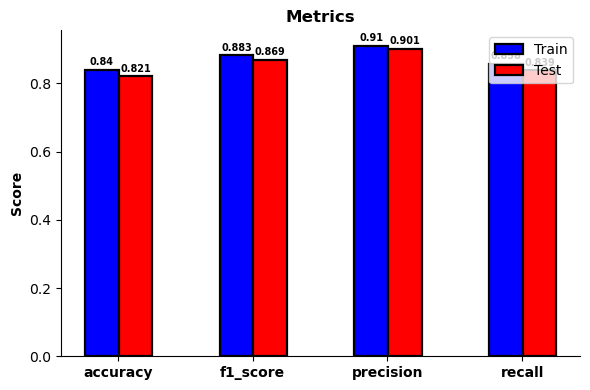

In [53]:
# We plot the metrics
plot_metrics(metrics_train, metrics_test, ['accuracy', 'f1_score', 'precision', 'recall'])

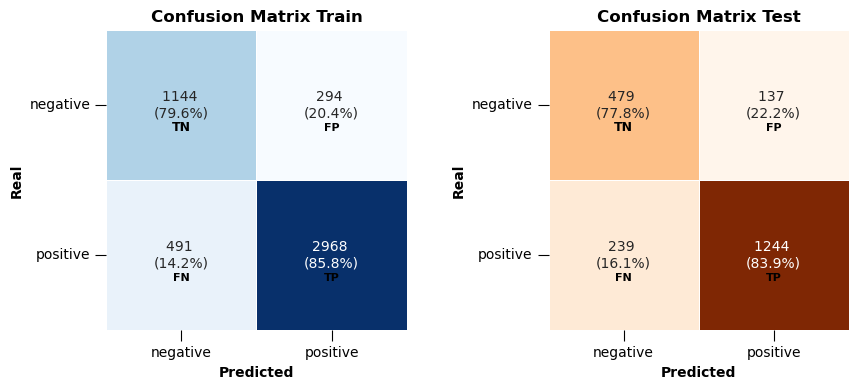

In [54]:
# We visualize the confusion matrix
confusion_matrix_plot(y_train, y_pred_train, y_test, y_pred_test, ['negative','positive'])